**Imports**

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Data**

In [13]:
def weighted_mean(values, weights):
    return np.average(values, weights=weights)

# Function to calculate weighted standard deviation
def weighted_std(values, weights):
    average = weighted_mean(values, weights)
    variance = np.average((values-average)**2, weights=weights)  # Weighted variance
    return np.sqrt(variance)

In [27]:
courses = {
    "Organisk": {"ECTS": 15 , "Grade": 12},
    "MatIntro": {"ECTS": 7.5 , "Grade": 12},
    "Uorganisk": {"ECTS": 7.5 , "Grade": 12},
    "NanoF1": {"ECTS": 7.5 , "Grade": 10},
    "NanoF2": {"ECTS": 7.5 , "Grade": 12},
    "LinAlg": {"ECTS": 7.5 , "Grade": 12},
    "Termo": {"ECTS": 7.5 , "Grade": 10},
    "NanoBio1": {"ECTS": 7.5 , "Grade": 12},
    "NanoBio2": {"ECTS": 7.5 , "Grade": 12},
    "Nanokvant": {"ECTS": 7.5 , "Grade": 12},
    "Kvantekemi": {"ECTS": 7.5 , "Grade": 12},
    "Nano3": {"ECTS": 7.5 , "Grade": 12},
    "KemiKS": {"ECTS": 7.5 , "Grade": 12},
    "Biofysik PUK": {"ECTS": 7.5 , "Grade": 12},
    "MatKem": {"ECTS": 7.5 , "Grade": 7},
    "Foto": {"ECTS": 7.5 , "Grade": 7},
    "AppStat": {"ECTS": 7.5 , "Grade": 10},
    "Exoplanets": {"ECTS": 7.5 , "Grade": 10},
    "VTKem": {"ECTS": 7.5 , "Grade": 12},
    "Bachelor": {"ECTS": 15 , "Grade": 12},
    "Tools": {"ECTS": 7.5 , "Grade": 12},
    "DynBio": {"ECTS": 7.5 , "Grade": 12},
    "BioInfo": {"ECTS": 7.5 , "Grade": 12},
}

In [28]:
grades, weights, course_names , means , stds = [], [], [], [], []

for course, details in courses.items():
    grades.append(details["Grade"])
    weights.append(details["ECTS"])
    course_names.append(course)
    
    cum_weighted_mean = weighted_mean(grades, weights)
    if len(grades) > 1:
        cum_weighted_std = weighted_std(grades, weights)
    else:
        cum_weighted_std = 0
    means.append(cum_weighted_mean)
    stds.append(cum_weighted_std)

**Visualization**

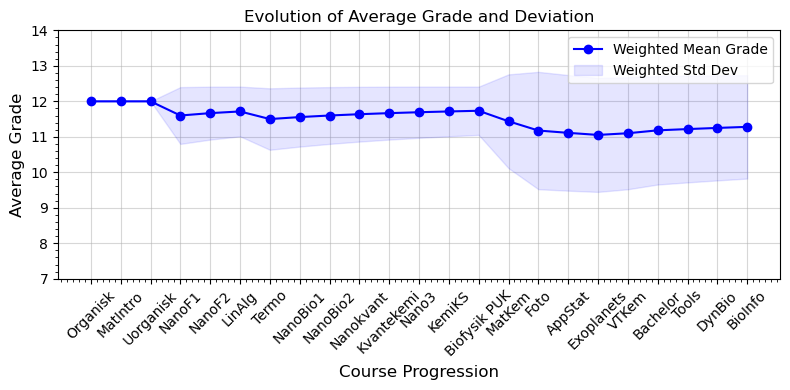

In [29]:
plt.figure(figsize = (8,4))

plt.plot(course_names, means, marker='o', linestyle='-', color='b', label='Weighted Mean Grade')
plt.fill_between(course_names, np.subtract(means, stds), np.add(means,stds), color='blue', alpha=0.1, label='Weighted Std Dev')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Evolution of Average Grade and Deviation',fontsize=12)
plt.xlabel('Course Progression',fontsize=12)
plt.ylabel('Average Grade',fontsize=12)
plt.ylim(7,14)
plt.xticks(rotation=45)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5,zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()

In [18]:
len(cum_weighted_mean)

TypeError: object of type 'numpy.float64' has no len()